In [1]:
#checking the data
import pandas as pd
import seaborn as sns
#preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from IPython.core.display import display, HTML

In [2]:
data = pd.read_csv('./input/data.csv/data.csv')

In [3]:
data = data.drop(columns='carat')

In [4]:
correlation_matrix = data.corr()
correlation_matrix

,depth,table,x,y,z,price
depth,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


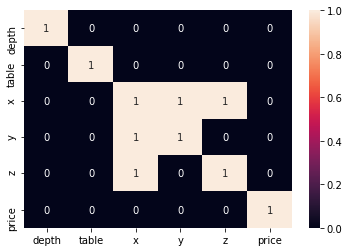

In [5]:
ax = sns.heatmap(correlation_matrix>0.95, annot=True)

In [6]:
steps = [
    
    StandardScaler(),
    Normalizer(),
    
]

pipe = make_pipeline(*steps)
X = data[['cut', 'color', 'clarity', 'depth', 'table','x','y', 'z']]


In [7]:
X_dummied = pd.get_dummies(X)
X_dummied

,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,61.9,57.0,8.44,8.36,5.20,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,63.2,57.0,8.56,8.50,5.39,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,61.0,57.0,6.03,6.01,3.67,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,63.3,60.0,4.68,4.64,2.95,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,61.6,55.0,4.39,4.37,2.70,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,62.8,61.0,6.63,6.56,4.14,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
40451,62.6,56.0,5.77,5.74,3.60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
40452,59.2,60.0,7.09,7.02,4.18,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
40453,61.4,56.0,5.76,5.83,3.56,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
#Cleaning the df using functions in steps
pipe = make_pipeline(*steps)
X_feats = pipe.fit_transform(X_dummied)

In [9]:
y = data.price

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feats, y, test_size=0.2)

In [11]:
model_linear = LinearSVC()
model_linear.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [12]:
y_pred = model_linear.predict(X_test) 


from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
print(f'R2 = {round(R2,2)}')

R2 = 0.59


## Test

In [13]:
check = pd.read_csv('./input/test.csv')

In [14]:
X_test = check[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z']]
X_test = pd.get_dummies(X_test)

In [15]:
X_test = pipe.fit_transform(X_test)

In [16]:
y_pred = model.predict(X_test) 


df3 = pd.DataFrame(y_pred)
df3 = df3.rename(columns={0:'price'})
df3['id']=df3.index
df3=df3[['id','price']]

NameError: name 'model' is not defined

In [ ]:
Ç